In [ ]:
import pandas as pd

df = pd.read_csv("training_features_extended_final.csv")
df.head()


,sent_len_tokens_mean,sent_len_tokens_max,token_len_chars_mean,token_len_chars_max,mattr,lexical_density,noun_ratio,verb_ratio,adj_ratio,pron_ratio,...,smog,cli,sp_rate,gr_rate,ratio_a1,ratio_a2,ratio_b1,ratio_b2,ratio_c1,label
0,8.571429,17,5.391667,11,0.905070,0.600000,0.276596,0.078014,0.078014,0.035461,...,3.1291,12.500840,10.084034,5.042017,0.575000,0.125000,0.033333,0.025000,0.033333,5.0
1,3.000000,3,2.333333,4,1.000000,0.333333,0.000000,0.250000,0.000000,0.250000,...,3.1291,-12.133333,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,4.0
2,5.000000,5,3.400000,6,1.000000,0.400000,0.166667,0.166667,0.000000,0.166667,...,3.1291,-2.000000,20.000000,0.000000,0.600000,0.000000,0.000000,0.000000,0.000000,2.0
3,9.400000,13,4.670213,10,0.876444,0.627660,0.198413,0.111111,0.063492,0.103175,...,3.1291,8.658696,16.129032,2.150538,0.670213,0.053191,0.021277,0.010638,0.021277,4.0
4,10.529412,27,5.296089,11,0.855846,0.625698,0.212389,0.141593,0.070796,0.048673,...,3.1291,12.421469,4.494382,1.123596,0.636872,0.083799,0.044693,0.011173,0.022346,5.0


In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=["label"])
y = df["label"]


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train_scaled, y_train)


LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import cohen_kappa_score
import numpy as np

y_pred = reg.predict(X_test_scaled)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

y_pred_rounded = np.clip(np.round(y_pred), y.min(), y.max()).astype(int)
qwk = cohen_kappa_score(y_test, y_pred_rounded, weights="quadratic")

print("RMSE:", rmse)
print("MAE:", mae)
print("QWK:", qwk)


RMSE: 1.0224403145138237
MAE: 0.7775517608071687
QWK: 0.7196891838675286


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, cohen_kappa_score


In [ ]:
df = pd.read_csv("training_features_extended.csv")



In [ ]:

target_col = 'label' if 'label' in df.columns else 'labels'
X = df.drop(columns=[target_col])
y = df[target_col].values.astype(int)


skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

results = {
    'MAE': [],
    'RMSE': [],
    'QWK': []
}

print(f"Starting 5-Fold CV with Scaling on {X.shape[1]} features...")



Starting 5-Fold CV with Scaling on 24 features...


In [ ]:
fold = 1
for train_index, test_index in skf.split(X, y):

    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]


    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)


    reg = LinearRegression()
    reg.fit(X_train_scaled, y_train)


    y_pred_raw = reg.predict(X_test_scaled)


    y_pred_rounded = np.clip(np.round(y_pred_raw), 0, 7).astype(int)

    mae = mean_absolute_error(y_test, y_pred_raw)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred_raw))
    qwk = cohen_kappa_score(y_test, y_pred_rounded, weights='quadratic')

    results['MAE'].append(mae)
    results['RMSE'].append(rmse)
    results['QWK'].append(qwk)

    print(f"Fold {fold}: QWK = {qwk:.4f} | MAE = {mae:.4f} | RMSE = {rmse:.4f}")
    fold += 1

Fold 1: QWK = 0.7545 | MAE = 0.6918 | RMSE = 0.9350
Fold 2: QWK = 0.7486 | MAE = 0.7522 | RMSE = 0.9610
Fold 3: QWK = 0.7532 | MAE = 0.6795 | RMSE = 0.8838
Fold 4: QWK = 0.7656 | MAE = 0.6956 | RMSE = 0.9031
Fold 5: QWK = 0.7763 | MAE = 0.7192 | RMSE = 0.9125


In [ ]:
for metric, values in results.items():
    mean_val = np.mean(values)
    std_val = np.std(values)
    print(f"{metric}: {mean_val:.4f} ± {std_val:.4f}")

MAE: 0.7077 ± 0.0257
RMSE: 0.9191 ± 0.0267
QWK: 0.7596 ± 0.0100


/tmp/ipython-input-4122848473.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipython-input-4122848473.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipython-input-4122848473.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipython-input-4122848473.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipython-input-4122848473.py:25: FutureWarning: 

Passin

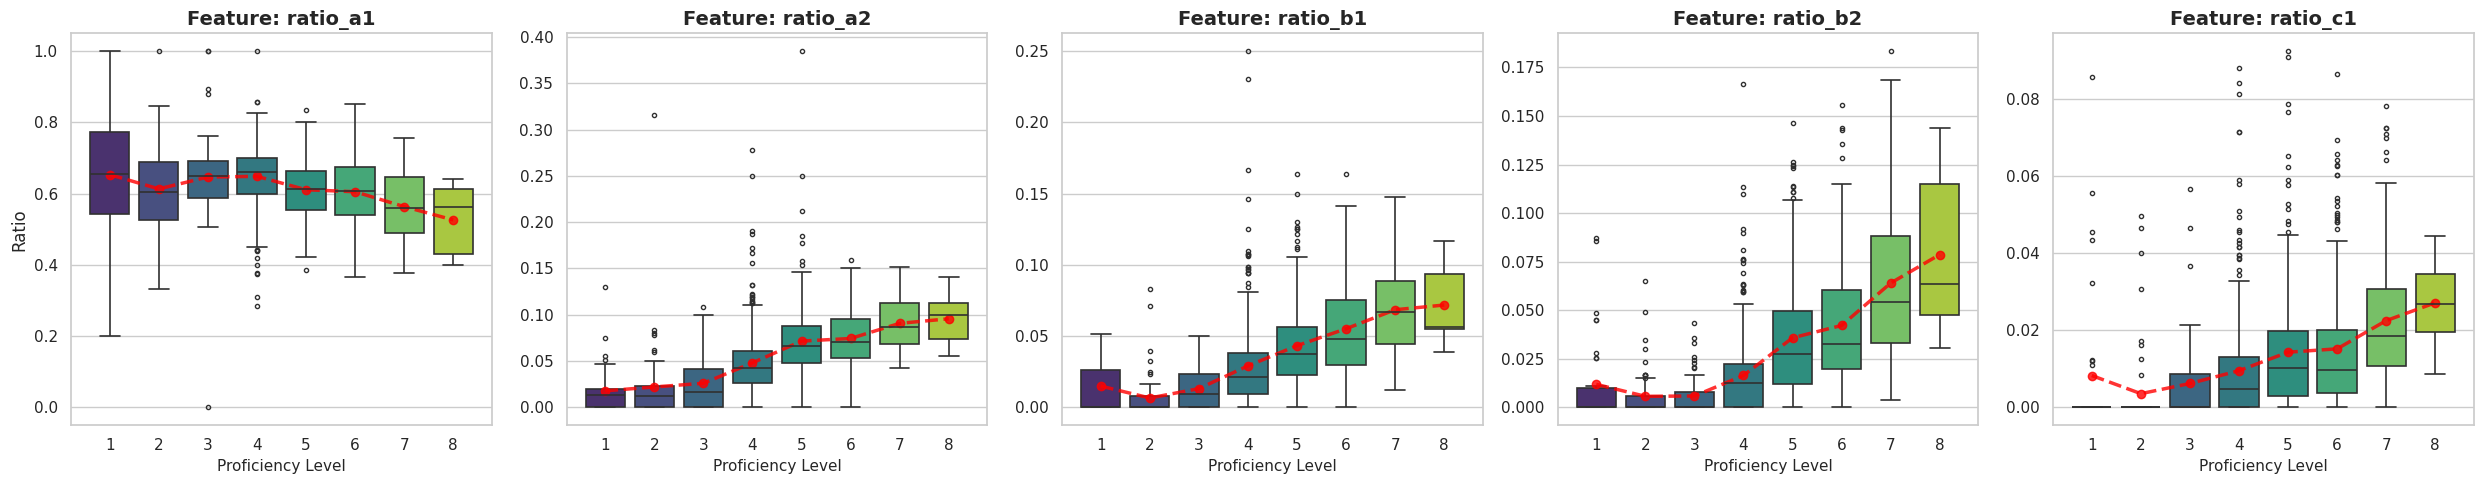

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np

# Select only the new vocab features
vocab_cols = ['ratio_a1', 'ratio_a2', 'ratio_b1', 'ratio_b2', 'ratio_c1']

# Setup the grid
n_features = len(vocab_cols)
n_cols = 5  # One row, all 5 plots side-by-side looks best for this
n_rows = 1

plt.figure(figsize=(25, 5)) # Wide figure
sns.set_theme(style="whitegrid")

# Ensure labels are sorted integers for the x-axis
df['label'] = df['label'].astype(int)
sorted_labels = sorted(df['label'].unique())

for i, feature in enumerate(vocab_cols):
    plt.subplot(n_rows, n_cols, i + 1)

    # 1. Boxplot with independent y-axis
    sns.boxplot(
        data=df,
        x='label',
        y=feature,
        palette="viridis",
        linewidth=1.2,
        fliersize=3,
        order=sorted_labels
    )

    # 2. The "Red Trend Line" (Mean)
    # This helps visualize the "slope" of improvement
    means = df.groupby('label')[feature].mean()
    # We plot against range(0,8) because boxplot x-axis is categorical 0,1,2...
    plt.plot(range(len(sorted_labels)), means.values,
             color='red', alpha=0.8, linewidth=2.5, linestyle='--', marker='o')

    # Formatting
    plt.title(f"Feature: {feature}", fontsize=14, fontweight='bold')
    plt.xlabel("Proficiency Level", fontsize=11)

    # Only label Y-axis on the first plot to reduce clutter?
    # NO, because scales are different! Label them all.
    plt.ylabel("Ratio" if i==0 else "")

plt.tight_layout()
plt.savefig("vocab_ratios_validation.png", dpi=300)
plt.show()

/tmp/ipython-input-3422750379.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipython-input-3422750379.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipython-input-3422750379.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipython-input-3422750379.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipython-input-3422750379.py:26: FutureWarning: 

Passin

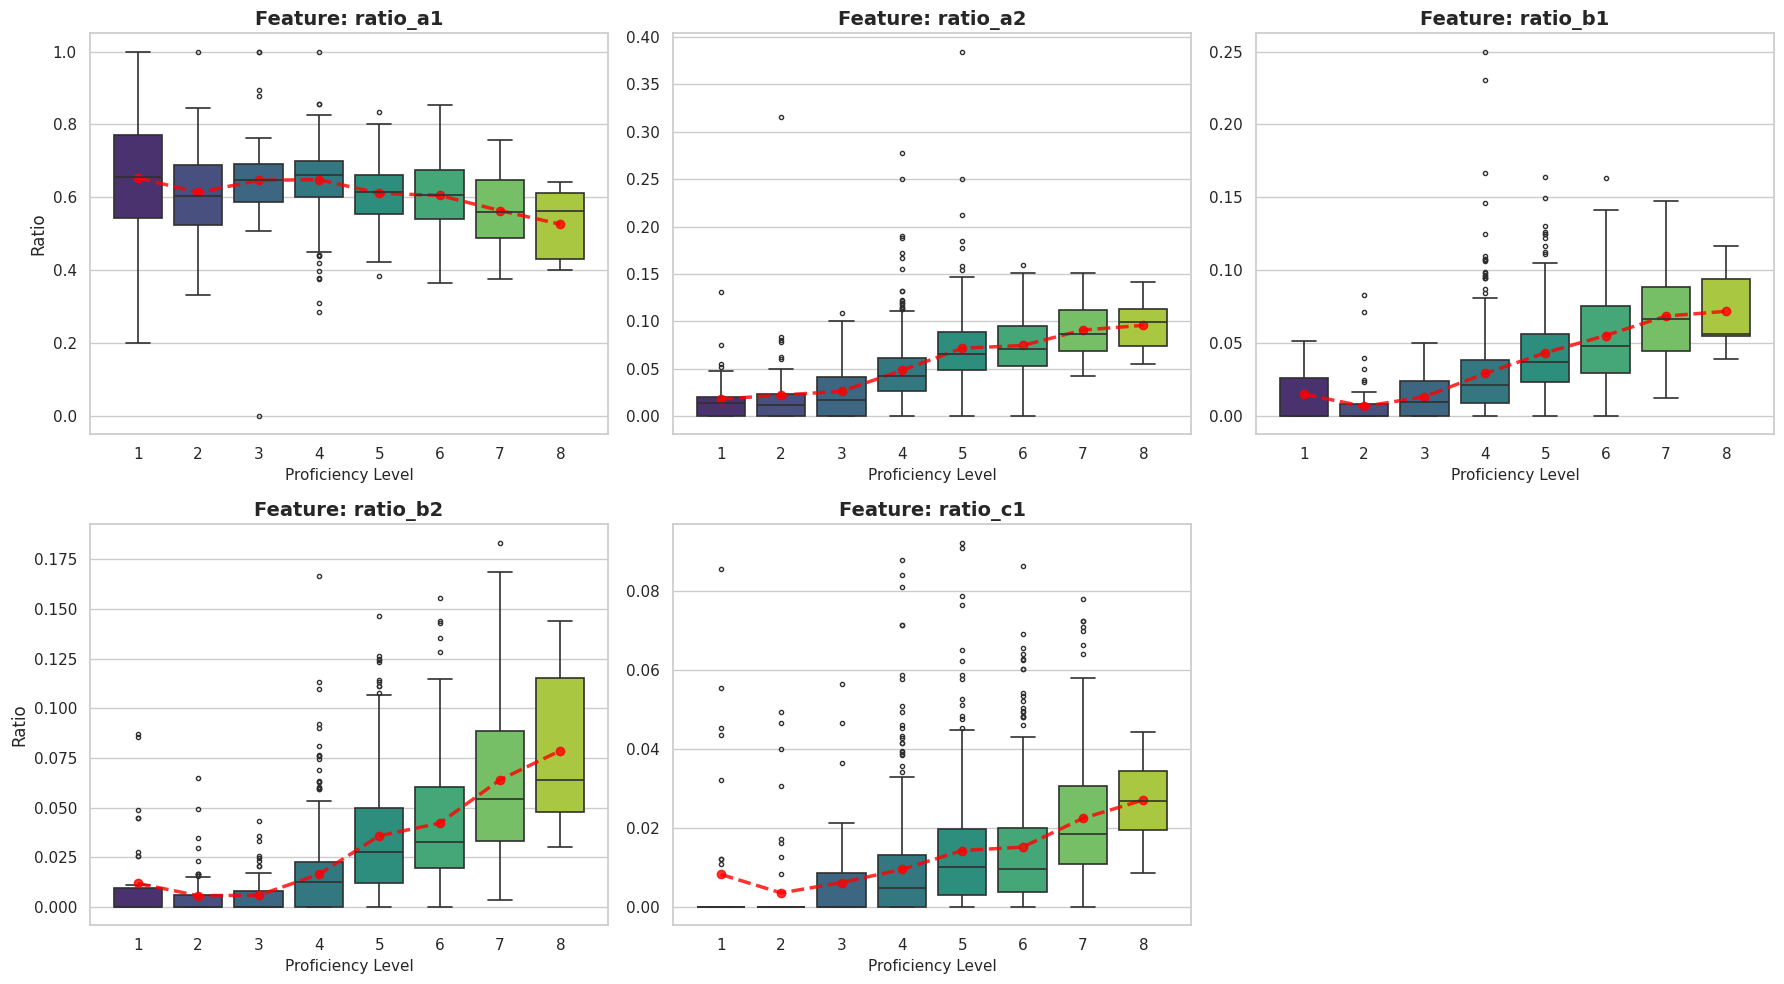

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Select only the new vocab features
vocab_cols = ['ratio_a1', 'ratio_a2', 'ratio_b1', 'ratio_b2', 'ratio_c1']

# --- CHANGE 1: Update Grid and Figure Size ---
n_cols = 3  # 3 columns
n_rows = 2  # 2 rows
# Changed figsize to be squarer (Width 18, Height 10) to accommodate 2 rows
plt.figure(figsize=(18, 10))

sns.set_theme(style="whitegrid")

# Ensure labels are sorted integers for the x-axis (assuming df exists)
# df['label'] = df['label'].astype(int)
# sorted_labels = sorted(df['label'].unique())

for i, feature in enumerate(vocab_cols):
    # --- CHANGE 2: Subplot logic handles the wrapping automatically ---
    # This naturally places plots 1-3 in row 1, and 4-5 in row 2
    plt.subplot(n_rows, n_cols, i + 1)

    # 1. Boxplot
    sns.boxplot(
        data=df,
        x='label',
        y=feature,
        palette="viridis",
        linewidth=1.2,
        fliersize=3,
        order=sorted_labels
    )

    # 2. The "Red Trend Line" (Mean)
    means = df.groupby('label')[feature].mean()
    plt.plot(range(len(sorted_labels)), means.values,
             color='red', alpha=0.8, linewidth=2.5, linestyle='--', marker='o')

    # Formatting
    plt.title(f"Feature: {feature}", fontsize=14, fontweight='bold')
    plt.xlabel("Proficiency Level", fontsize=11)

    # --- CHANGE 3: Y-Label Logic ---
    # We want labels on the first column of BOTH rows (indices 0 and 3)
    if i % n_cols == 0:
        plt.ylabel("Ratio", fontsize=12)
    else:
        plt.ylabel("")

# --- CHANGE 4: Remove empty 6th subplot (optional but cleaner) ---
# Since 2x3 = 6 slots, but we only have 5 plots, the bottom-right will be empty.
# This ensures no ticks/box appear there.
if len(vocab_cols) < n_rows * n_cols:
    for j in range(len(vocab_cols), n_rows * n_cols):
        fig = plt.gcf()
        ax = fig.add_subplot(n_rows, n_cols, j + 1)
        ax.axis('off')

plt.tight_layout()
plt.savefig("vocab_ratios_2rows.png", dpi=300)
plt.show()

In [ ]:
df = pd.read_csv("training_data.csv")
features_df = pd.read_csv("training_features_extended_final.csv")



/tmp/ipython-input-1952823641.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlations_with_length.values, y=correlations_with_length.index, palette=colors_leak)


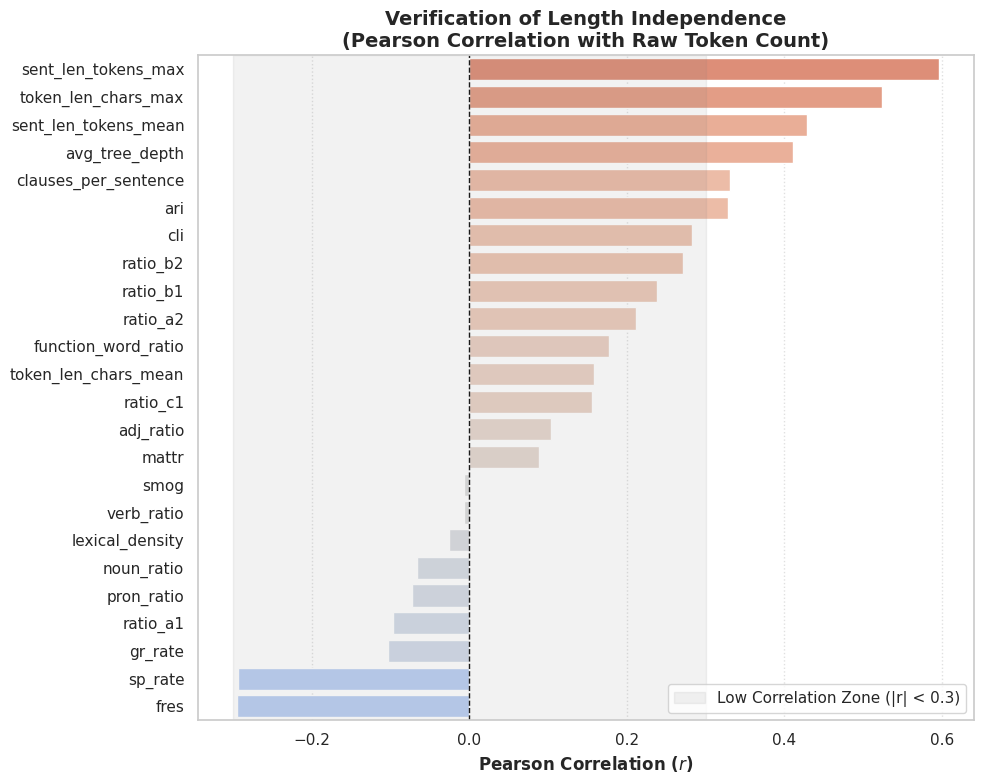

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
import matplotlib.cm as cm

# 1. Calculate Raw Length (just for this check, don't use it for training!)
# Simple approximation: just count spaces + 1, or use spacy if you want precision
df['raw_token_count'] = df['text'].apply(lambda x: len(x.split()))

# 2. Calculate Correlation of Features with Raw Length
# We drop the label and the raw length itself from the rows
correlations_with_length = features_df.join(df['raw_token_count']).corrwith(df['raw_token_count'])
correlations_with_length = correlations_with_length.drop(['label', 'raw_token_count']).sort_values(ascending=False)


norm_leak = plt.Normalize(-1, 1)
colors_leak = [cm.coolwarm(norm_leak(v)) for v in correlations_with_length.values]

# 3. Plot
plt.figure(figsize=(10, 8))
# Use a diverging palette: Red = High Correlation (Warning?), Blue = Negative
sns.barplot(x=correlations_with_length.values, y=correlations_with_length.index, palette=colors_leak)

plt.title("Verification of Length Independence\n(Pearson Correlation with Raw Token Count)", fontsize=14, fontweight='bold')
plt.xlabel("Pearson Correlation ($r$)", fontsize=12, fontweight='bold')
plt.ylabel("")
plt.axvline(0, color='k', linestyle='--', linewidth=1)
plt.grid(axis='x', linestyle=':', alpha=0.6)

# Add green/red zones for interpretation
plt.axvspan(-0.3, 0.3, color='grey', alpha=0.1, label='Low Correlation Zone (|r| < 0.3)')
plt.legend(loc='lower right')

plt.tight_layout()
plt.savefig("length_leakage_check.png", dpi=300)
plt.show()